In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

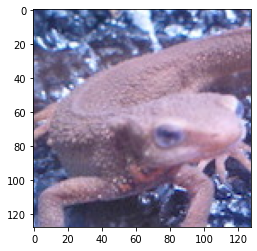

In [34]:
img = cv2.imread("../imori.jpg")
H, W, ch = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [45]:
rad = np.pi / 6

ox = int(f * (np.cos(rad)*(H/2) + np.sin(rad)*(W/2)))
oy = int(f * (-np.sin(rad)*(H/2) + np.cos(rad)*(W/2)))
dx = int(H/2 - ox)
dy = int(W/2 - oy)

output_img_1 = np.zeros((H, W, ch))
output_img_2 = output_img_1.copy()
for i in range(H):
    for j in range(W):
        f = (np.cos(rad)*np.cos(rad) + np.sin(rad)*np.sin(rad))
        x = int((np.cos(rad)*i + np.sin(rad)*j) / f)
        y = int((-np.sin(rad)*i + np.cos(rad)*j) / f)
        if 0 <= x < H and 0 <= y < W:
            output_img_1[i, j] = img[x, y]
        x += dx
        y += dy
        if 0 <= x < H and 0 <= y < W:
            output_img_2[i, j] = img[x, y]

output_img_1 = output_img_1.astype("uint8")
output_img_2 = output_img_2.astype("uint8")

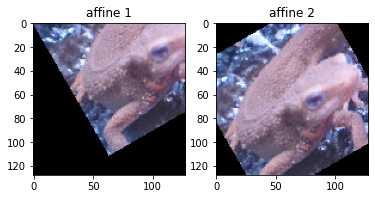

In [46]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(output_img_1, cv2.COLOR_BGR2RGB))
plt.title("affine 1")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_img_2, cv2.COLOR_BGR2RGB))
plt.title("affine 2")
plt.show()